# Correlogramas (Chatfield)
a) If a time series is completely random, then for large $N$, $r_k = 0$ for all non-zero values of $k$. In fact we
will see later that for a random time series $r_k$ is approximately $N(O, 1/N)$, so that, if a time series is random,
19 out of 20 of the values of can be expected to lie between $±2/\sqrt{N}$. 

However if one plots say the first 20 values of then one can expect to find one 'significant' value on
average even when the time series really is random. This spotlights one of the difficulties in interpreting the
correlogram, in that a large number of coefficients is quite likely to contain one (or more) 'unusual' results, even when
no real effects are present. (See also Section 4.1.)

In [1]:
%matplotlib inline
# Done to load packages from lower directory
import os
os.chdir("../..")

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tsa import autocorrelogram, autoregressive

def plot_autocorrelogram(X):
    n = len(X)
    lag_limit = n/4 + 1
    lags = range(lag_limit+1)

    sp = autocorrelogram(X, lags).plot(style="bo-")

    sp.set_xlabel("Lag")
    sp.set_ylabel("Autocorrelation")
    sp.set_title("Autocorrelogram")
    sp.set_ylim([-1, 1])

    confidence_value = 2 / np.sqrt(n)
    # Draw confidence interval
    sp.axhline(confidence_value, linestyle='dashed', color='g')
    sp.axhline(-confidence_value, linestyle='dashed', color='g')
    # Draw axes
    sp.axvline(0, color="k")
    sp.axhline(0, color="k")


## White Noise

If $Z_t = e_t$, with $\{ e_1, e_2, \ldots, \}$ iid random variables, then correlation $r_k$ should tend to zero

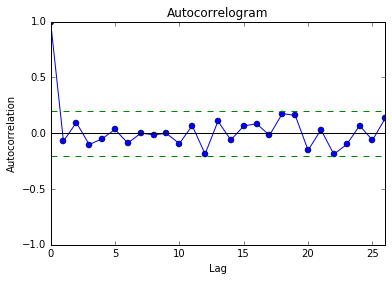

In [2]:
Z = pd.Series(np.random.randn(100))

plot_autocorrelogram(Z)

Ejercicio 2 Chatfield:


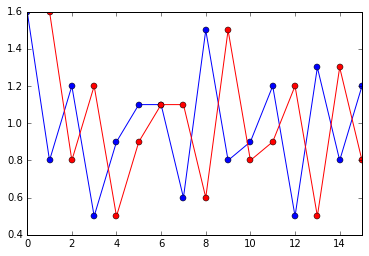

In [3]:
X = pd.Series([ 1.6,0.8, 1.2,0.5,0.9, 1.1, 1.1, 0.6, 1.5,0.8,0.9, 1.2,0.5, 1.3,0.8, 1.2])
Y = X.shift(1)
X.plot(style="o-")
Y.plot(style="ro-")

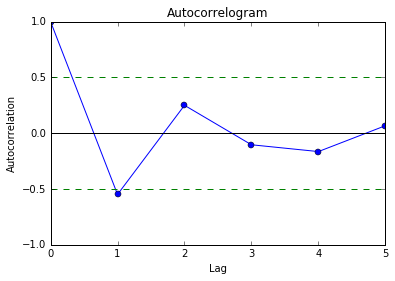

In [4]:
plot_autocorrelogram(X)

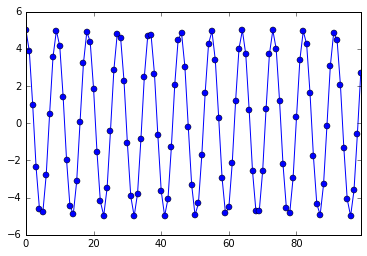

In [5]:
## Seasonal
import math

a = 5
w = np.random.rand() * math.pi

Y = pd.Series([a * math.cos(t*w) for t in range(100)])

Y.plot(style="bo-")

## Random Walk
\begin{align*}
X_0 &= Z_0 \\
X_{t+1} &= X_t + Z_{t+1} \
\end{align*}

It comes to be the cumulative sum of $Z_1 + Z_2 + \ldots + Z_t$. So $E[X_t]=0$ but $Var[X_t] = t\sigma^2$ so it is not an stationary process

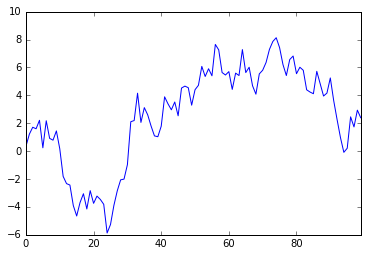

In [6]:
# Random Walk
Z = pd.Series(np.random.randn(100))


Z.cumsum().plot()

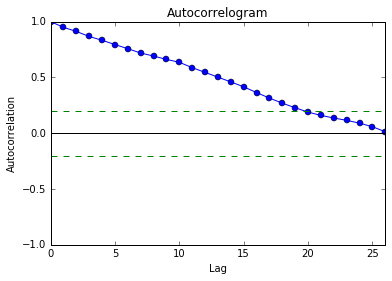

In [7]:
plot_autocorrelogram(Z.cumsum())

## Moving Average



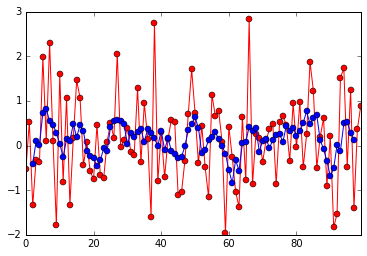

In [8]:
Z = pd.Series(np.random.randn(100))

X = (Z.shift(-2) + Z.shift(-1) + Z + Z.shift(1) + Z.shift(2)) / 5.0

Z.plot(style="ro-")
X.plot(style="bo-")

La autocorrelación es 0 a partir del orden del proceso! Como vemos en el gráfico, a partir de 5, entra en valores casi nulos.

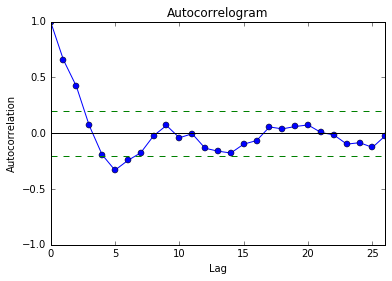

In [9]:
plot_autocorrelogram(X)

Hagamos un proceso de orden 1

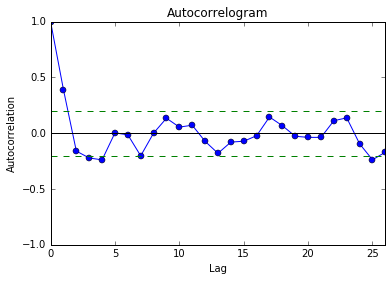

In [10]:
X = 0.5 * (Z.shift(-1) + Z)

plot_autocorrelogram(X)

## Modelos Autoregresivos

Sea $Z_t$ una serie de ruido blanco. Un proceso autoregresivo de orden $1$ es de la forma
$$
X_{t+1} = \alpha X_t + Z_t
$$

In [11]:
Z = np.random.randn(100)
alpha = 0.5

En este caso, el proceso tiene un $0 < \alpha < 1$ => es estacionario (ver en Chatfield...)

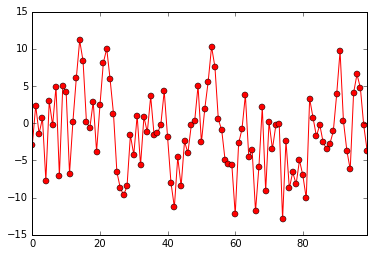

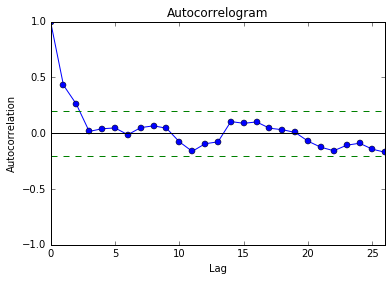

In [12]:
Z = np.random.randn(100) * 5
X = autoregressive(Z, 0.5)

X.plot(style="ro-")
plt.show()

plot_autocorrelogram(X)

El siguiente caso no es estacionario. Se puede ver en el autocorrelograma que esta no desciende salvo cuando $k$ es muy grande

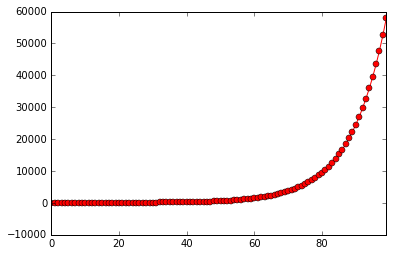

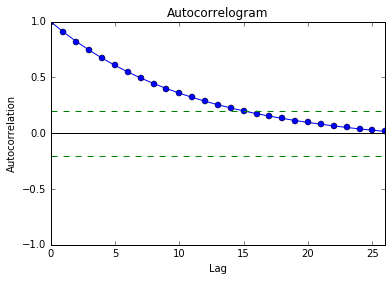

In [13]:
Z = np.random.randn(100) * 20

X = autoregressive(Z, 1.0999999999999)

X.plot(style="ro-")

plt.show()

plot_autocorrelogram(X)